**1. Import các thư viện cần thiết**

In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error as msle

**2. Đọc file dữ liệu và chia dataset theo tỉ lệ 7:3**

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('D:\STB.csv')

df = df[['Price','Low']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df1 = df
# Split the data into training, testing, and validation
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]


**Xem** **lại** **dataset**

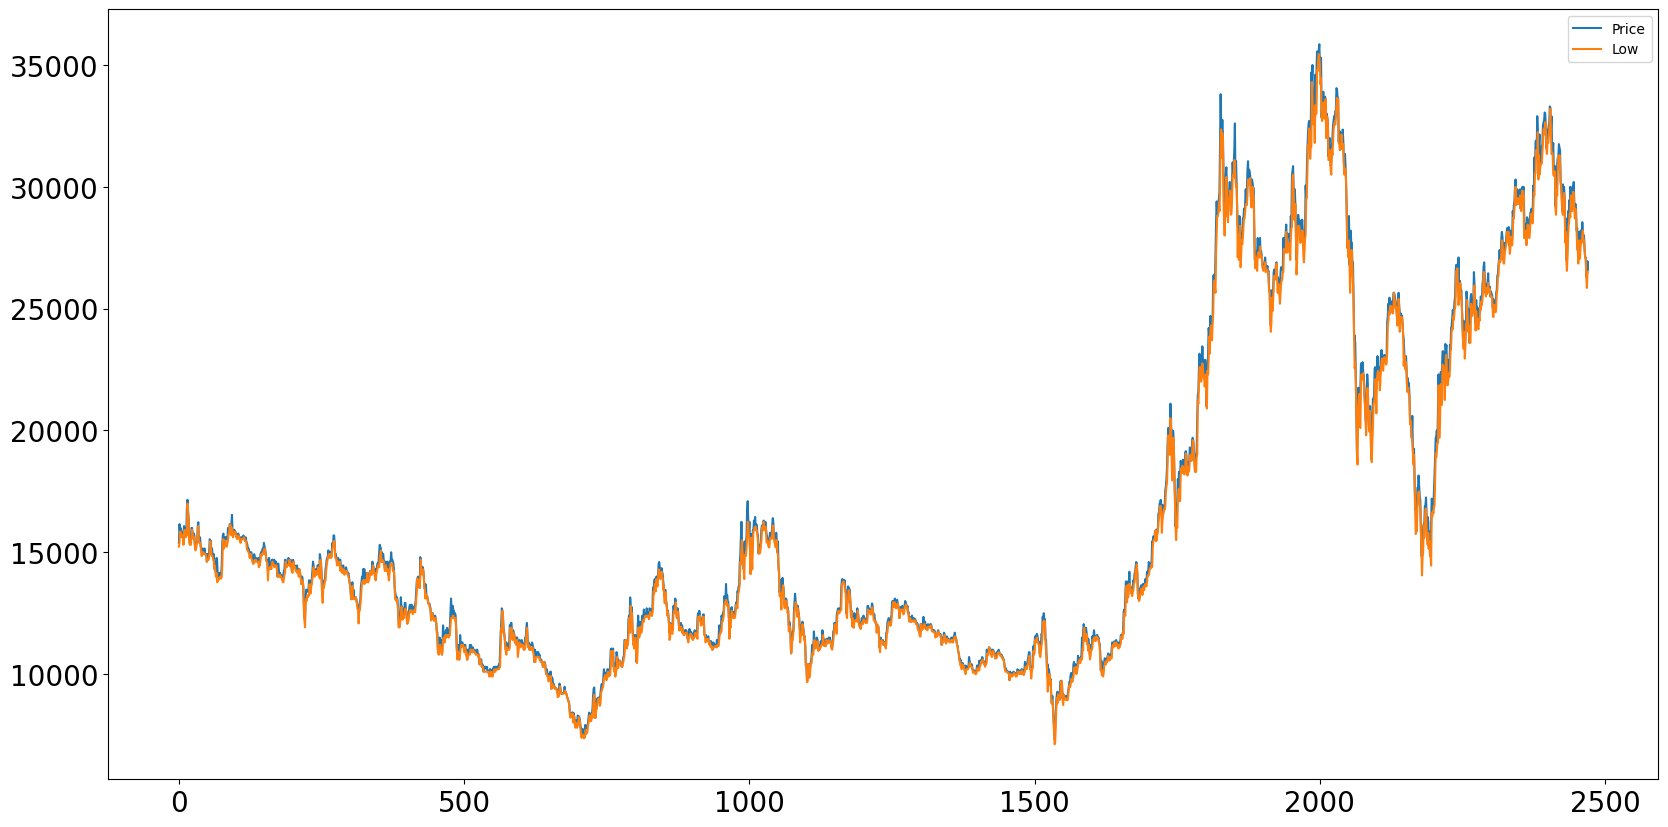

In [3]:
df.plot(figsize=(20, 10), fontsize=20)
plt.show()

***Tìm m thích hợp***

In [4]:
# Dùng adf để kiểm tra xem dataset có stationary hay chưa
from statsmodels.tsa.stattools import adfuller
adfuller(df['Price'])

(-1.5299166309944383,
 0.518663537961039,
 27,
 2443,
 {'1%': -3.4330295678957983,
  '5%': -2.8627238067228236,
  '10%': -2.5674001882176833},
 36622.82516437444)

In [5]:
# Vì dataset chưa stationary nên ta thực hiện diff()
df_diff = df1['Price'].diff().dropna()

In [6]:
# Tiếp tục dùng adf để kiểm tra xem p value có < 0.05 ko
adfuller(df_diff)

(-8.164252642536608,
 8.971648539457473e-13,
 26,
 2443,
 {'1%': -3.4330295678957983,
  '5%': -2.8627238067228236,
  '10%': -2.5674001882176833},
 36608.47738287806)

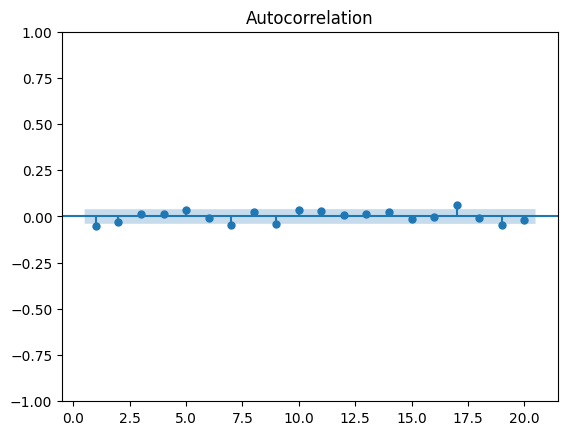

In [7]:
# Sau khi dataset đã stationary vẽ acf để tìm m
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff, lags = 20 , zero = False)
plt.show()

**3. Dùng auto_arima để tìm model thích hợp**

In [8]:
df

,Price,Low
0,15385,15231.0
1,16154,15385.0
2,15846,15846.0
3,16000,15846.0
4,15769,15769.0
...,...,...
2466,27100,27050.0
2467,26300,26300.0
2468,26600,25850.0
2469,26950,26450.0


In [9]:
# Tạo y_train, x_train
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])
# Dùng auto_arima để tìm thông số thích hợp
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal = True, m =5)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=24238.836, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=24231.961, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=24231.714, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=24231.682, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=24229.980, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=24230.065, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=24230.055, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[5] intercept   : AIC=24232.051, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=24233.613, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=24233.591, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=24233.829, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[5]          
Total fit time: 1.684 seconds


**Dùng SARIMAX để train model**

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = SARIMAX(y_train, exog = np.array(train_data['Price']), order=(0,1,0), seasonal_order=(0,0,0,5))
model_fit = model1.fit()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**4. Quá trình test**

In [11]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
exg = np.array(test_data['Low'])
y_pred_test = model_fit.predict(start=len(y_train), end=len(y_test)+len(y_train)-1, exog=exg)
y_pred_test

array([16900., 17450., 17700., 17850., 18650., 19800., 19500., 19400.,
       19000., 20500., 20250., 19200., 17950., 18850., 19700., 19350.,
       18050., 17000., 16050., 15500., 16100., 16000., 17150., 17550.,
       17600., 17100., 17100., 18200., 18450., 18250., 18550., 18500.,
       18300., 18200., 18200., 18500., 19050., 19000., 18300., 18150.,
       18500., 18300., 18400., 18850., 19000., 18900., 18750., 19000.,
       19600., 19550., 19150., 18750., 18300., 18450., 18300., 18900.,
       19000., 21250., 21100., 21800., 22600., 22600., 22100., 22000.,
       22200., 22750., 22600., 22200., 22200., 21800., 22000., 22300.,
       21000., 20900., 22450., 22300., 22900., 23850., 23150., 24050.,
       24300., 23800., 23700., 24450., 24800., 26050., 26150., 25850.,
       25650., 27300., 28100., 28800., 28800., 28900., 29350., 29000.,
       30000., 31900., 32350., 31200., 32200., 31800., 30000., 28600.,
       28000., 28800., 28800., 30400., 29800., 29000., 28550., 29500.,
      

**6. Quá trình tạo index predict 30 ngày tiếp theo**

In [12]:
# Dùng thuật toán LR để tìm giá trị Low cho 30 ngày tiếp theo
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data['Low'])

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán giá trị low 30 ngày tiếp theo
low_next_30_days = ln_model.predict(x_next_30_days)

# Predict the closing prices for the next 30 days
y_next_30_days = model_fit.predict(start=len(x_train), end = len(x_train)+ len(x_next_30_days)-1, exog=low_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[9612.43725587 9610.82093947 9609.20462306 9607.58830665 9605.97199025
 9604.35567384 9602.73935743 9601.12304103 9599.50672462 9597.89040821
 9596.27409181 9594.6577754  9593.04145899 9591.42514259 9589.80882618
 9588.19250977 9586.57619337 9584.95987696 9583.34356055 9581.72724415
 9580.11092774 9578.49461133 9576.87829493 9575.26197852 9573.64566211
 9572.02934571 9570.4130293  9568.79671289 9567.18039649 9565.56408008]


***7.Đánh giá độ chính xác thuật toán***

In [13]:
#MSLE
test_msle = msle(y_test, y_pred_test)
print('Testing MSLE:', test_msle)

#RMSE
test_rmse = np.sqrt(np.mean((y_pred_test - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred_test - y_test))
print('Testing MAE:', test_mae)

Testing MSLE: 0.0006061179210677703
Testing RMSE: 607.4853591144921
Testing MAPE: 1.6577825808250342
Testing MAE: 423.14439946019115


**8. Vẽ biểu đồ**

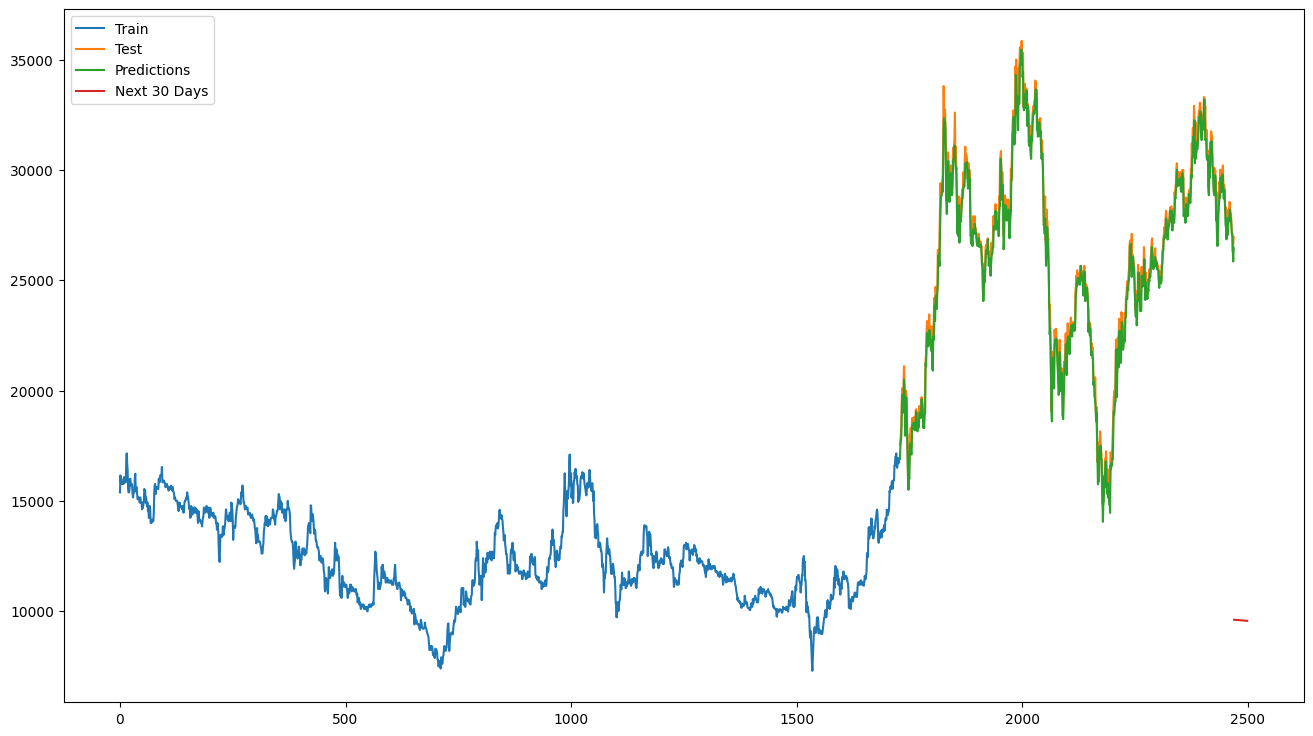

In [14]:
plt.figure(figsize=(16,9))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred_test)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next 30 Days'])
plt.show()